# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
df.shape


(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [ ]:
df_i = df.info()
df_i
col_name = list(df.columns.values )
df_t = df.describe()
df_t

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


4) Какие признаки имеют пропуски?

In [ ]:
# первый вариант - посмотреть по кол-ву значений в info
df_i = df.info()
df_i
# max значение 32561, соотвественно всё, что меньше - не указано
# видно, что скрывают workclass, occupation, native.country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# вариант номер 2
for i in col_name:
  print(f'                 ')
  print(f'{i} --------------------')
  unique_count = df[i].nunique()
  sort_v = df[i].value_counts(dropna=False).sort_index(ascending=True)
  #dropna=False - чтобы не выкидывало Nan, ascending=True -  в алфавитном порядке
  print(unique_count)
  print(sort_v)
  #na_count = df[df[i] == ' ?'][i].count() - не работает, просто не ищет,либо я что-то неправильно делаю

#print(df.isnull().sum())
#print(na_count)

# чекаем, где NaN (и количество), можно заодно посмотреть значения "0"

                 
age --------------------
73
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64
                 
workclass --------------------
8
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
NaN                   1836
Name: workclass, dtype: int64
                 
fnlwgt --------------------
21648
12285      1
13769      1
14878      1
18827      1
19214      1
          ..
1226583    1
1268339    1
1366120    1
1455435    1
1484705    1
Name: fnlwgt, Length: 21648, dtype: int64
                 
education --------------------
16
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc 

In [ ]:
#  вариант 3
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

1. occupation / направление деятельности -

0) подписана секретность

1) не понимают, как влияет на результаты

2) стыдятся направления деятельности


  2. workclass / рабочий класс -

0) подписана секретность

1) не понимают, как влияет на результаты

2) стыдятся деятельности


  3. native country / родная страна -

0) Много стереотипов, связанных с культурой и людьми из рахных стран

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
# смотрим в п. 4
unique_count = df['workclass'].nunique()
sort_v = df['workclass'].value_counts(dropna=False).sort_index(ascending=True)
print('----------',unique_count, ' - уникальных значений')
print(sort_v)

---------- 8  - уникальных значений
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
NaN                   1836
Name: workclass, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [ ]:
m_age1 = df.groupby('sex')['age'].mean()
print(m_age1)#если не убирать строчки с nan

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

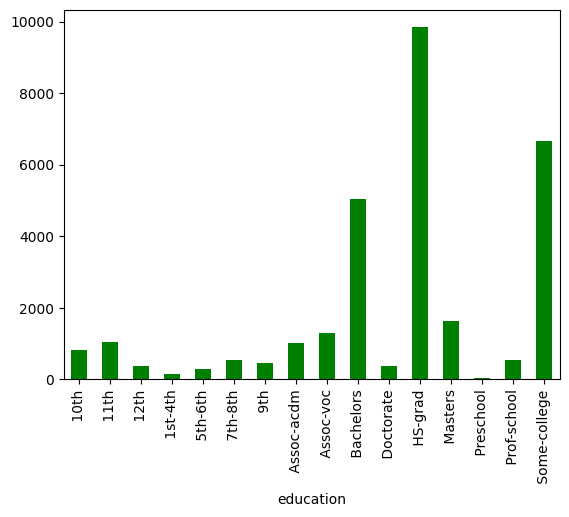

In [ ]:
%matplotlib inline
df2 = df.dropna()
#df.groupby('education').count()['age'].plot(kind='bar')
df2.groupby('education').size().plot(kind='bar', color = 'green')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
age_i = df.groupby('income')['age']

print(age_i.mean(), age_i.std())


income
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64 income
 <=50K    14.020088
 >50K     10.519028
Name: age, dtype: float64


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

<Axes: xlabel='education'>

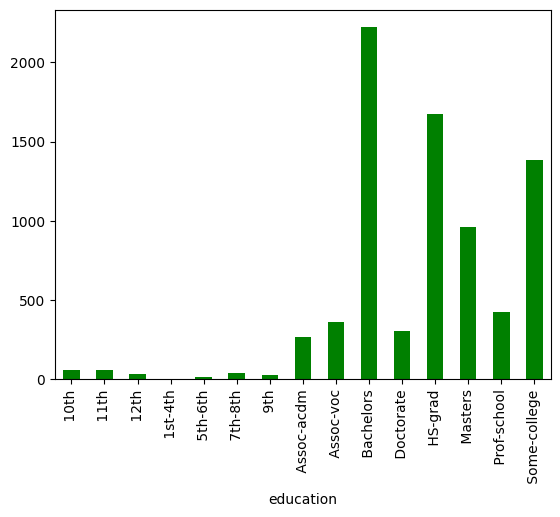

In [ ]:
income_ed = df[df['income'] == ' >50K']
inc_ed = income_ed.groupby('education').count()['age']
inc_ed.plot(kind = 'bar',color = 'green')

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
marr_male = df [(df['sex'] == ' Male') & ((df['marital.status'] == ' Married-civ-spouse') |
 (df['marital.status'] == 'Married-spouse-absen') | (df['marital.status'] == ' Married-AF-spouse')) ]
un_marr_male = df [(df['sex'] == ' Male') & ((df['marital.status'] != ' Married-civ-spouse') &
 (df['marital.status'] != 'Married-spouse-absen') & (df['marital.status'] != ' Married-AF-spouse')) ]

marr_inc = marr_male.groupby('income')['age'].count()[' >50K']
un_marr_inc = un_marr_male.groupby('income')['age'].count()[' >50K']
print(f'{marr_inc} - среди женатых зарабатывают > 50K')
print(f'{un_marr_inc} - среди не женатых зарабатывают > 50K')

5942 - среди женатых зарабатывают > 50K
720 - среди не женатых зарабатывают > 50K


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



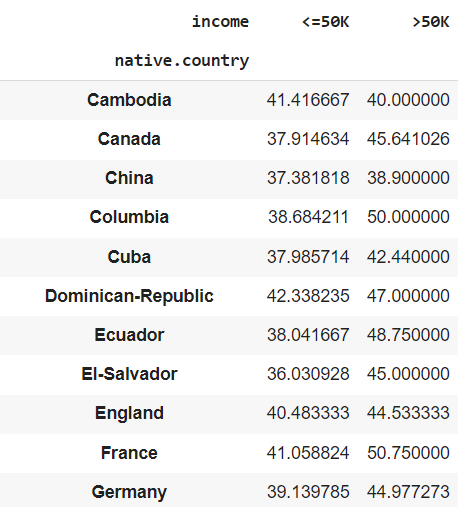

In [ ]:
pd.pivot_table(df2,
               index='native.country',
               columns= 'income',
               values='hours.per.week',
               aggfunc='mean')

income,<=50K,>50K
native.country,,
Cambodia,41.545455,40.000000
Canada,38.704225,46.944444
China,38.541667,38.900000
Columbia,39.259259,50.000000
Cuba,38.716418,42.440000
Dominican-Republic,42.138462,47.000000
Ecuador,38.739130,48.750000
El-Salvador,36.208791,45.000000
England,41.375000,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

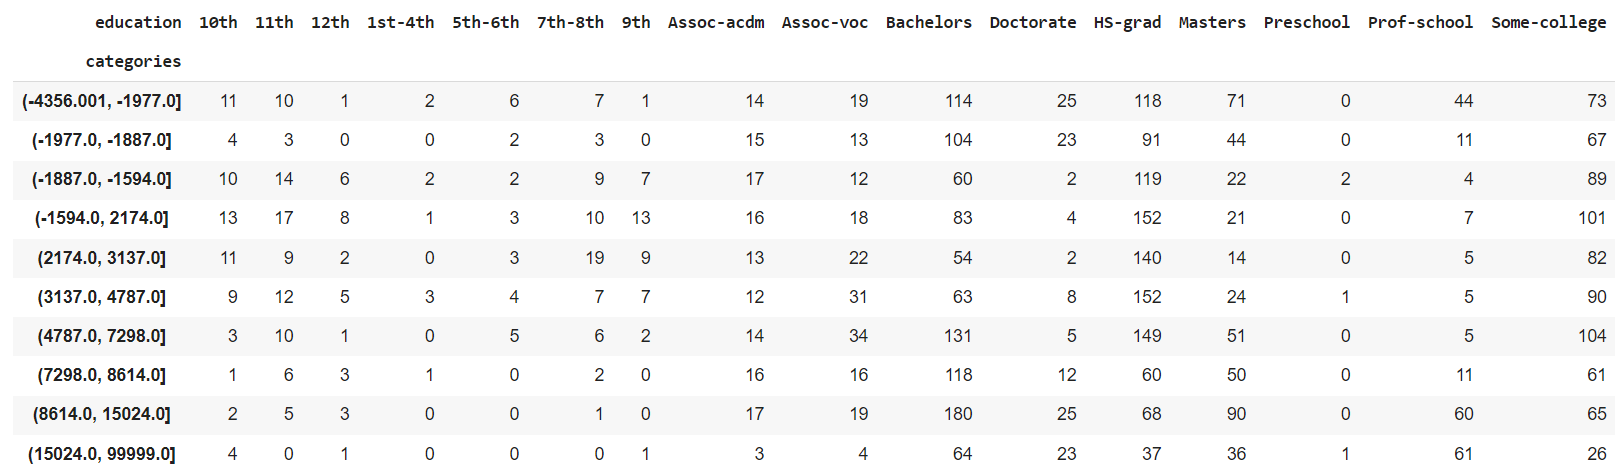

In [ ]:
summary_table = df.loc[:, ['education']]
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss']
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)
pd.pivot_table(df,
               index=summary_table['categories'],
               columns='education',
               values='age',
               aggfunc='count')

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

<Axes: xlabel='native.country'>

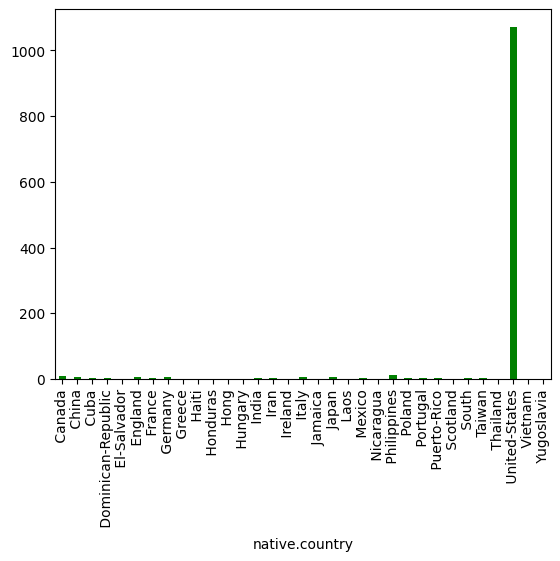

In [ ]:
income_female = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
inc_fe = income_female.groupby('native.country').count()['age']

inc_fe.plot(kind = 'bar', color = 'green') # лучше, наверное, записать цифрами....

In [ ]:
income_female = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
inc_fe = income_female.groupby('native.country')['age'].count().sort_values(ascending=False)
inc_fe #ну, теперь оно и понятно...

native.country
 United-States         1072
 Philippines             12
 Canada                   9
 Germany                  7
 England                  6
 Japan                    5
 China                    5
 Italy                    5
 Taiwan                   4
 Cuba                     3
 France                   3
 South                    3
 Mexico                   2
 Dominican-Republic       2
 India                    2
 Iran                     2
 Puerto-Rico              2
 Portugal                 2
 Poland                   2
 Vietnam                  1
 Thailand                 1
 Scotland                 1
 Greece                   1
 Nicaragua                1
 Haiti                    1
 Laos                     1
 El-Salvador              1
 Jamaica                  1
 Ireland                  1
 Hungary                  1
 Hong                     1
 Honduras                 1
 Yugoslavia               1
Name: age, dtype: int64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
df['magic_salary'] = df['income'].apply(lambda x: np.random.randint(0, 51)
  if ' <=50K' in x
  else np.random.randint(51, 201))
income_ed = df.groupby('education')['magic_salary'].apply(lambda x: ((x / 4) / df.loc[x.index, 'hours.per.week']).mean()).sort_values(ascending=False)
income_ed

education
 Doctorate       0.696234
 Prof-school     0.564250
 Masters         0.544192
 Bachelors       0.422685
 Assoc-acdm      0.384084
 Assoc-voc       0.348164
 Some-college    0.319747
 10th            0.291795
 HS-grad         0.281003
 11th            0.268416
 7th-8th         0.259435
 12th            0.248440
 9th             0.225726
 1st-4th         0.218303
 5th-6th         0.203433
 Preschool       0.201716
Name: magic_salary, dtype: float64

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
columns='datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count'.split(',')
df = pd.read_csv('https://raw.githubusercontent.com/siyuanligit/Bike-Sharing-Demand-Kaggle/master/data/train.csv',skiprows=[0], names=columns)
column_name = list(df.columns.values )
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
for i in column_name:
  print(f'                 ')
  print(f'{i} --------------------')
  unique_count = df[i].nunique()
  sort_v = df[i].value_counts(dropna=False).sort_index(ascending=True)

  print(unique_count)
  print(sort_v)

                 
datetime --------------------
10886
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
                      ..
2012-12-19 19:00:00    1
2012-12-19 20:00:00    1
2012-12-19 21:00:00    1
2012-12-19 22:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
                 
season --------------------
4
1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64
                 
holiday --------------------
2
0    10575
1      311
Name: holiday, dtype: int64
                 
workingday --------------------
2
0    3474
1    7412
Name: workingday, dtype: int64
                 
weather --------------------
4
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
                 
temp --------------------
49
0.82       7
1.64       2
2.46       5
3.28      11
4.10      44
4.92      60
5.74     107
6.56     146
7.38     106
8.20     229
9.02     248
9.8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

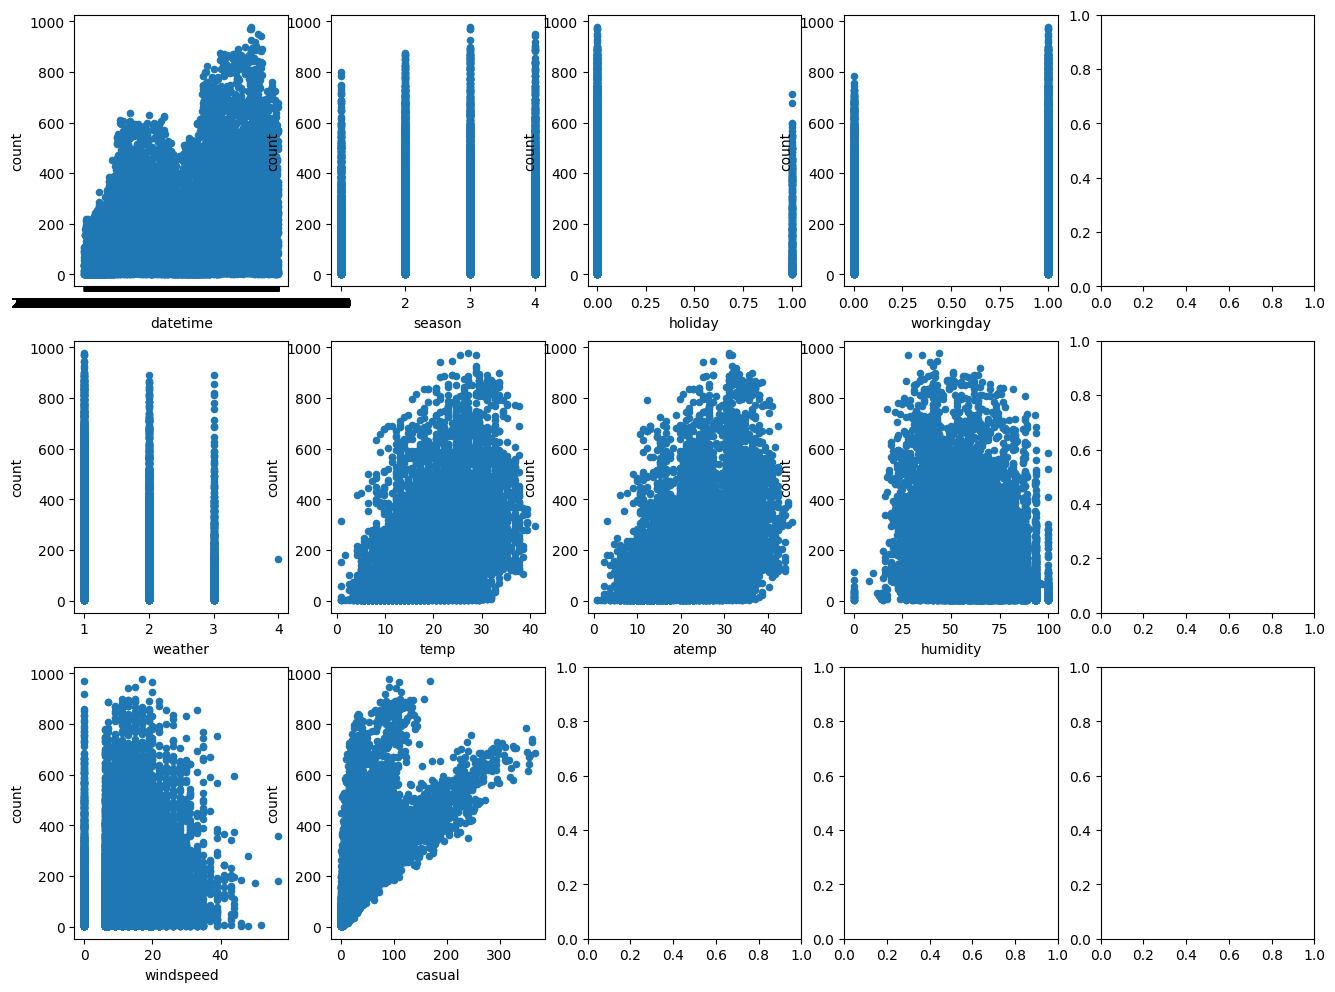

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:10]):
     df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





1. Прокаты осуществляются во все сезоны, но больше всего осенью и зимой (это что, южное полушарие? Австралия/НЗ?).


1. Чаще арендуют в выходные/праздничные дни
2. Арендуют чаще всего в хорошую малооблачную погоду (логично) и при температуре в диапазоне (20, 30)


Ответ:

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



<ipython-input-107-5e99812dd68b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


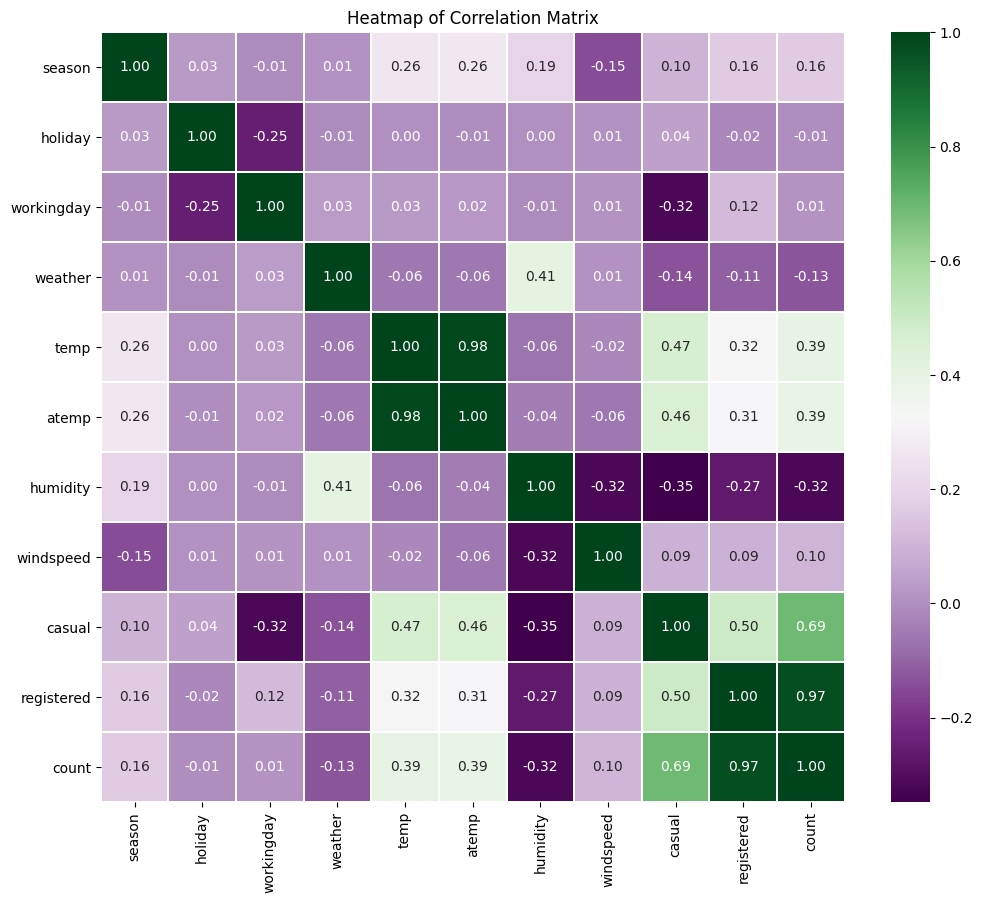

In [ ]:
corr_matrix = df.corr()

# Отображение heatmap корреляционной матрицы
plt.figure(figsize=(12, 10))
map_color = "PRGn"
sns.heatmap(corr_matrix, annot=True, cmap=map_color, fmt=".2f", linewidths=0.05)
plt.title("Heatmap of Correlation Matrix")
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Больше всего:
1. Прямая зависимость:
casual, registered
2. Обратная зависимость:
humidity

Меньше всего:
1. Прямая зависимость:
workingday
2. Обратная зависимость:
holiday

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



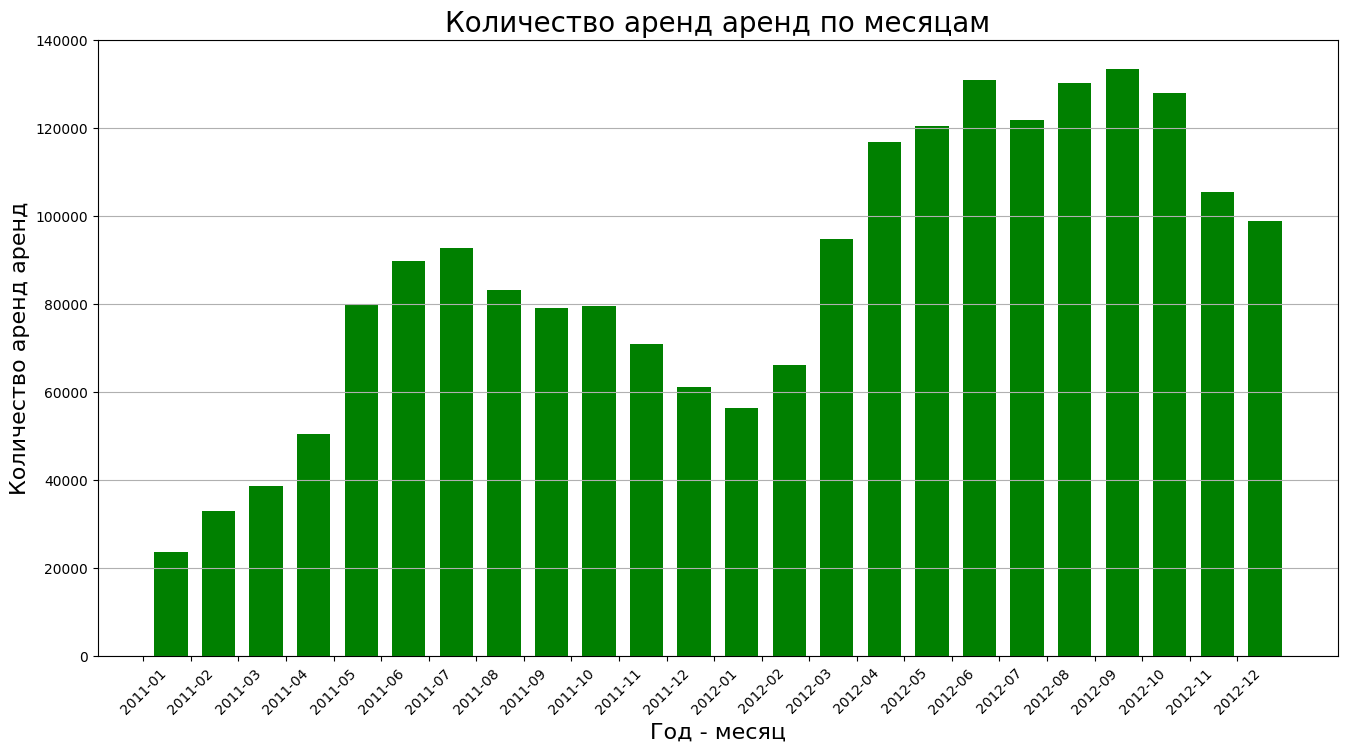

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
data = df.groupby(['year', 'month'])['count'].sum().reset_index()
plt.figure(figsize=(16, 8))
bar_width = 0.7
x_pos = data['month'] - 0.6 * bar_width + (data['year'] - 2011) * 12
plt.bar(x_pos, data['count'], width=bar_width, color = 'green')
plt.xlabel('Год - месяц', fontsize=16)
plt.ylabel('Количество аренд аренд', fontsize=16)
plt.title('Количество аренд аренд по месяцам', fontsize=20)
plt.xticks(range(0, len(data)), [f"{y}-{m:02d}" for y, m in zip(data['year'], data['month'])], rotation=45)
plt.grid(axis='y')
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

1. Увеличили фонд велочипедов/разрослась сеть
2. Закупили рекламу, популяризировали деятельность проката

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



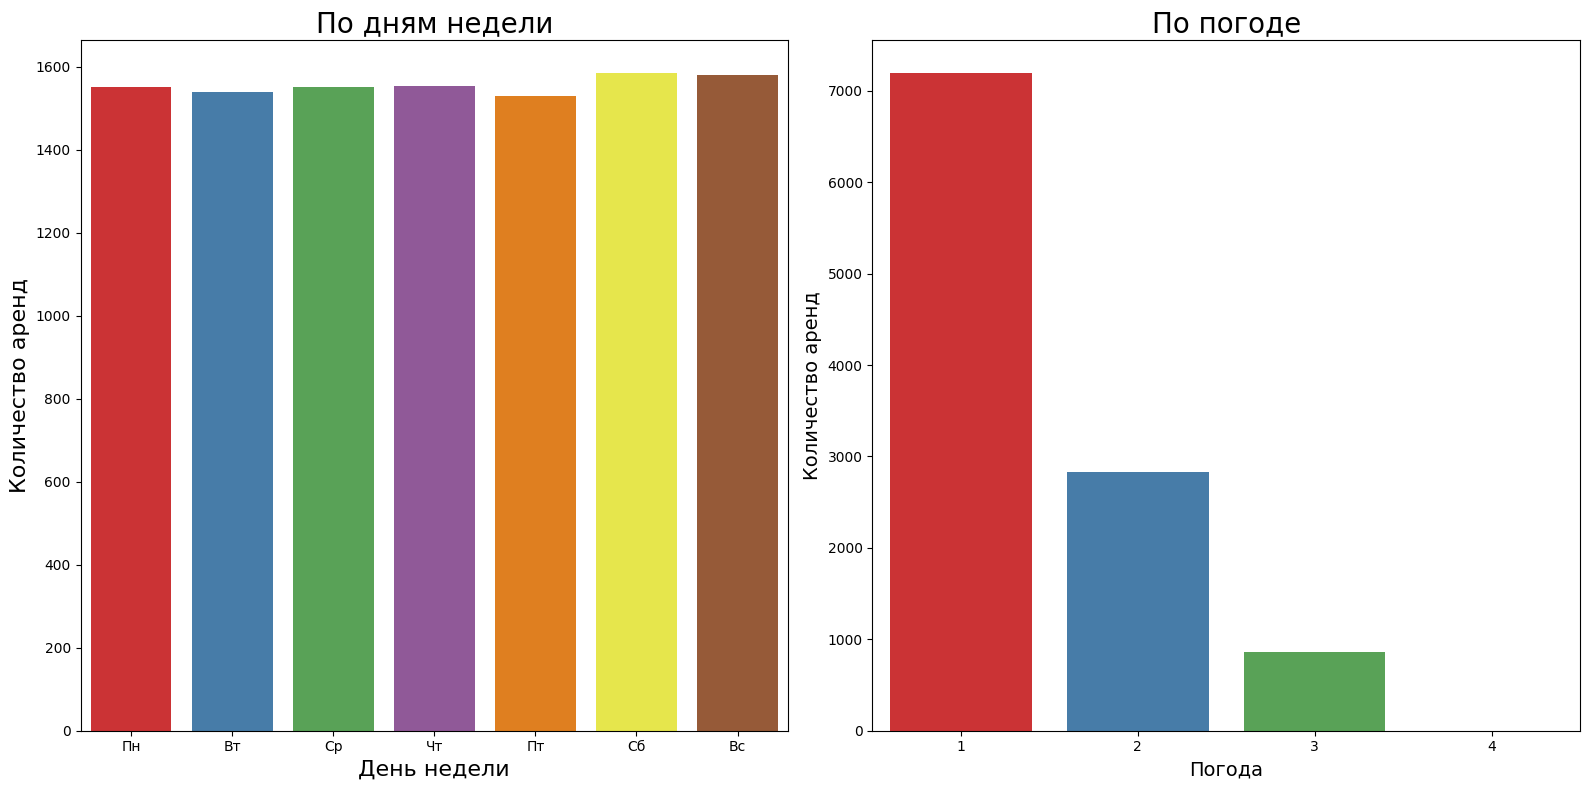

In [ ]:
df['weekday'] = df['datetime'].dt.dayofweek
plt.figure(figsize=(16, 8))
# номер раз
plt.subplot(1, 2, 1)
sns.countplot(x='weekday', data=df, palette = "Set1")
plt.xlabel('День недели', fontsize=16)
plt.ylabel('Количество аренд', fontsize=16)
plt.title('По дням недели', fontsize=20)
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
#номер два
plt.subplot(1, 2, 2)
sns.countplot(x='weather', data=df, palette = "Set1")
plt.xlabel('Погода', fontsize=14)
plt.ylabel('Количество аренд', fontsize=14)
plt.title('По погоде', fontsize=20)

plt.tight_layout() #автоматически настраивает размеры и положение элементов графика для наилучшего визуального представления
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



dt.dayofweek - главный компонент, вытаскивает дни недели
Предполагаю, что неделя начинается в понедельник, который обозначается как 0, и заканчивается в воскресенье, которое обозначается как 6.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Равномерное распределение

### 5. Распределение

Постройте распределение целевого признака.


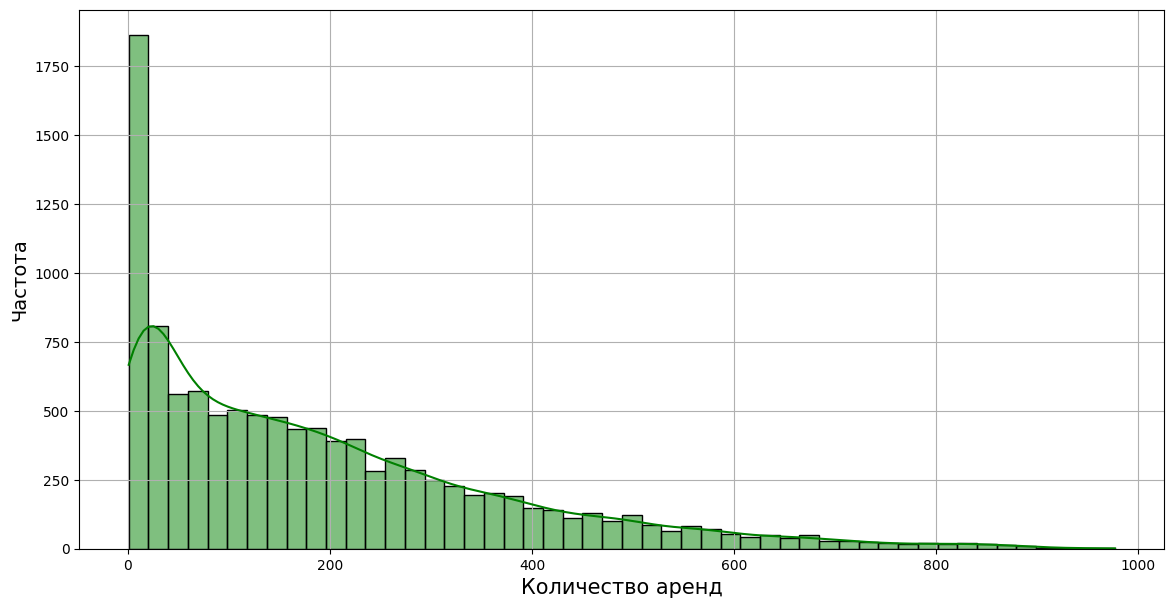

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(df['count'], bins=50, kde=True, color = 'green')
plt.xlabel('Количество аренд', fontsize=15)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

10 - 20

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



<Figure size 1400x700 with 0 Axes>

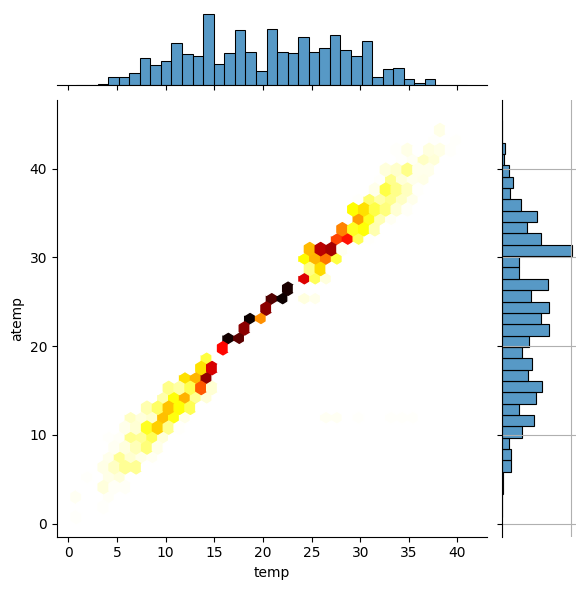

In [ ]:
plt.figure(figsize=(14, 7))
sns.jointplot(x='temp', y='atemp', data=df, kind='hex', cmap='hot_r')
plt.grid(True)
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

так вроде все сходится с данными...

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




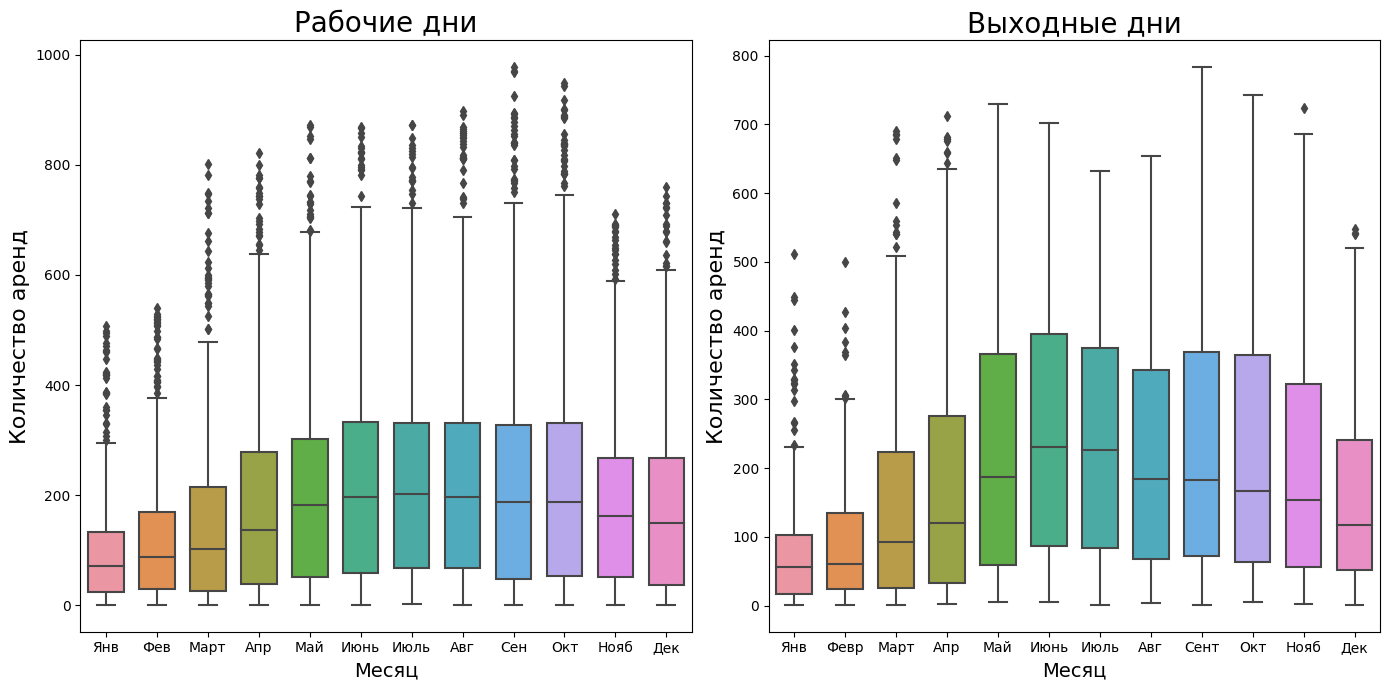

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
workingday_df = df[df['workingday'] == 1]
sns.boxplot(x='month', y='count', data=workingday_df, width=0.7)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество аренд', fontsize=16)
plt.title('Рабочие дни', fontsize=20)
plt.xticks(range(0, 12), ['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Нояб', 'Дек'])

plt.subplot(1, 2, 2)
non_workingday_df = df[df['workingday'] == 0]
sns.boxplot(x='month', y='count', data=non_workingday_df, width=0.7)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество аренд', fontsize=16)
plt.title('Выходные дни', fontsize=20)
plt.xticks(range(0, 12), ['Янв', 'Февр', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Нояб', 'Дек'])

plt.tight_layout()
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Предполагаю, что в теплое время года ( а как мы поняли, это конец лета-осень-зима) прокатов больше, так как люди чаще гуляют и отдыхают

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [ ]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [ ]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


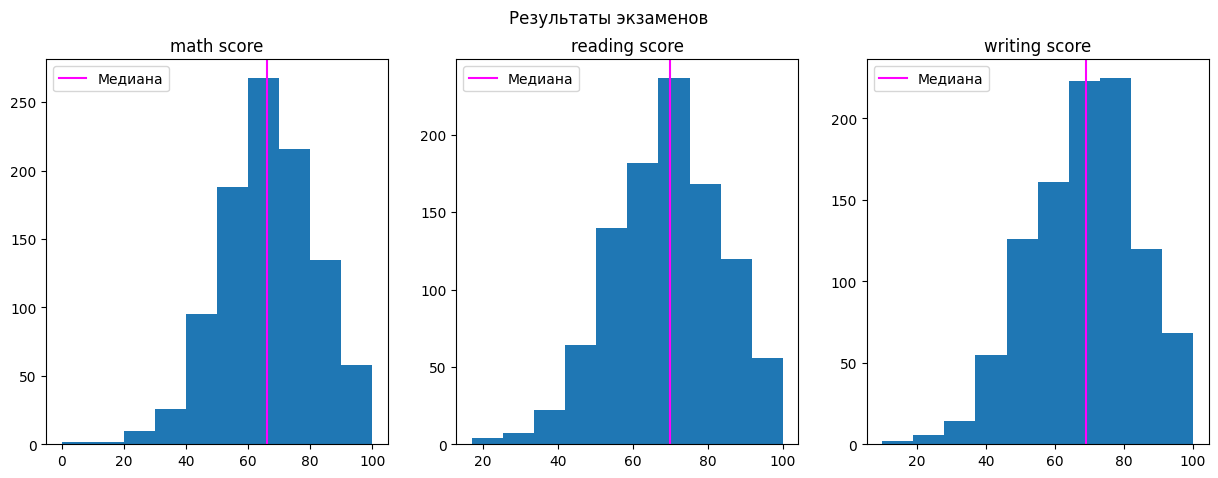

In [ ]:
median_sc = df[['math score', 'reading score', 'writing score']].median()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов')

for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    axs[i].hist(df[subject], bins=10)
    axs[i].axvline(median_sc[subject], color='magenta', label='Медиана')
    axs[i].set_title(subject)
    axs[i].legend()

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


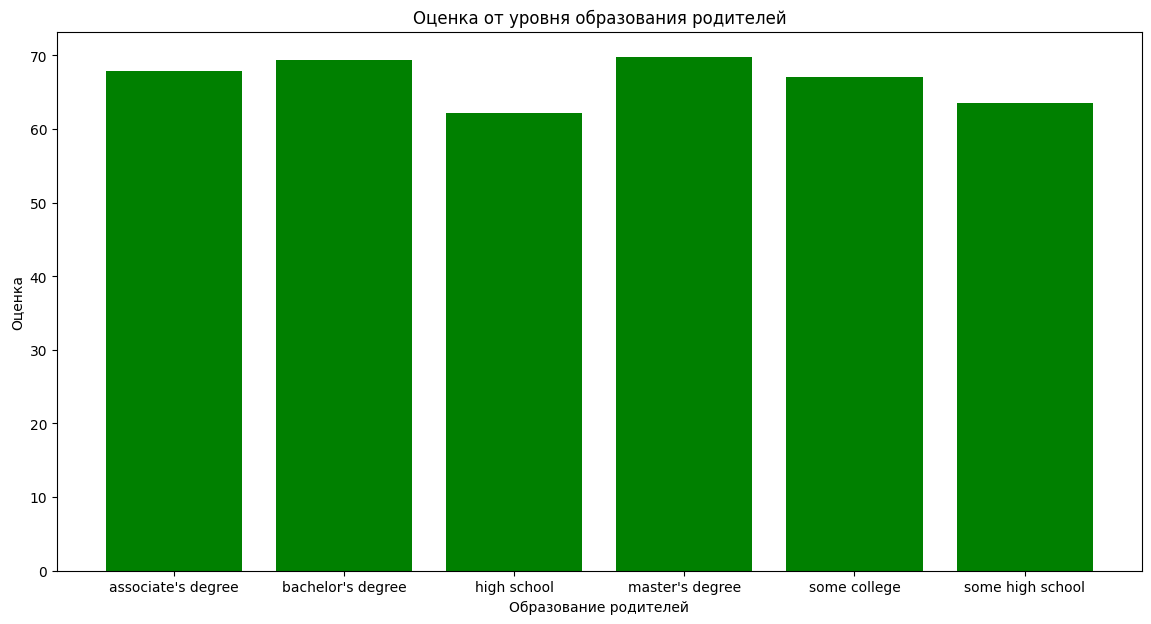

In [ ]:
math_scores_by_education = df.groupby('parental level of education')['math score'].mean()

plt.figure(figsize=(14, 7))
plt.bar(math_scores_by_education.index, math_scores_by_education.values, color='green')
plt.xlabel('Образование родителей')
plt.ylabel('Оценка')
plt.title('Оценка от уровня образования родителей')
plt.show()

#сразу видно, что оценка ниже у тех,чьи родители закончили только старшую школу и, как я поняла, неполное среднее?...Some high school

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
female_student_know = df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]
print(f'Количество студентов (Ж), набрабравших по всем предметам > 90 баллов = {len(female_student_know)}')

Количество студентов (Ж), набрабравших по всем предметам > 90 баллов = 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
scores_gender = df.groupby('gender')[
    ['math score', 'reading score', 'writing score']].agg(
    ['min', 'max', 'median'])
scores_gender.columns = ['Math Min', 'Math Max', 'Math Median',
                         'Reading Min', 'Reading Max', 'Reading Median',
                         'Writing Min', 'Writing Max', 'Writing Median']
scores_gender

,Math Min,Math Max,Math Median,Reading Min,Reading Max,Reading Median,Writing Min,Writing Max,Writing Median
gender,,,,,,,,,
female,0,100,65.0,17,100,73.0,10,100,74.0
male,27,100,69.0,23,100,66.0,15,100,64.0


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [ ]:
scores_gender_preparation = df.groupby(['gender', 'lunch', 'test preparation course'])[
                                      ['math score', 'reading score', 'writing score']].agg('mean')
scores_gender_preparation.columns = ['Math Mean', 'Reading Mean', 'Writing Mean']

scores_gender_preparation

Math Mean  Reading Mean  \
gender lunch        test preparation course                            
female free/reduced completed                60.785714     73.428571   
                    none                     52.890756     63.831933   
       standard     completed                71.131579     79.798246   
                    none                     66.530233     73.386047   
male   free/reduced completed                65.639344     65.786885   
                    none                     60.609524     59.076190   
       standard     completed                75.955752     72.601770   
                    none                     69.832512     64.719212   

                                             Writing Mean  
gender lunch        test preparation course                
female free/reduced completed                   74.371429  
                    none                        61.781513  
       standard     completed                   81.508772  
                    none                        72.967442  
male   free/reduced completed                   65.737705  
                    none                        55.285714  
       standard     completed                   71.982301  
                    none                        61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

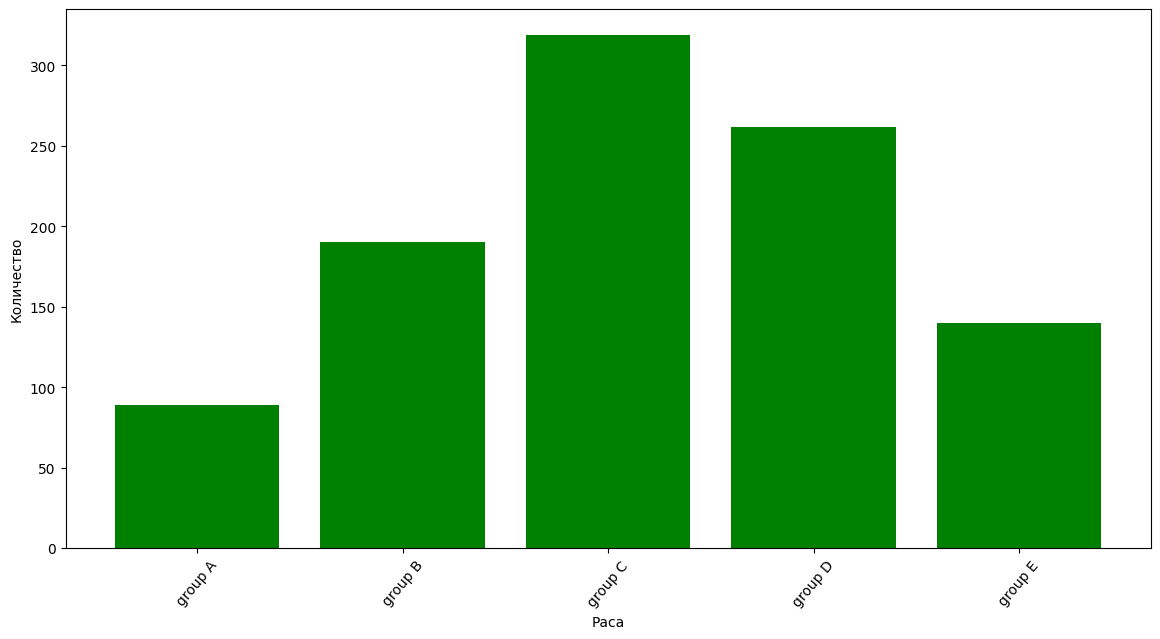

In [ ]:
race_education = df.groupby('race/ethnicity')['parental level of education'].value_counts().groupby(level=0).sum()

plt.figure(figsize=(14, 7))
plt.bar(race_education.index, race_education.values, color='green')
plt.xlabel('Раса')
plt.ylabel('Количество')
plt.xticks(rotation=50)

plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

<Figure size 640x480 with 0 Axes>

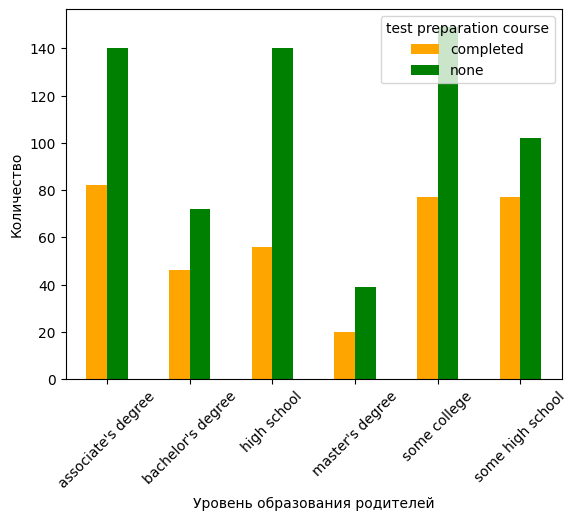

In [ ]:
test_prep_by_education = df.groupby('parental level of education')['test preparation course'].value_counts().unstack(fill_value=0)

plt.figure()
colors = ['orange','green'] #красивенько
test_prep_by_education.plot(kind='bar', color=colors)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

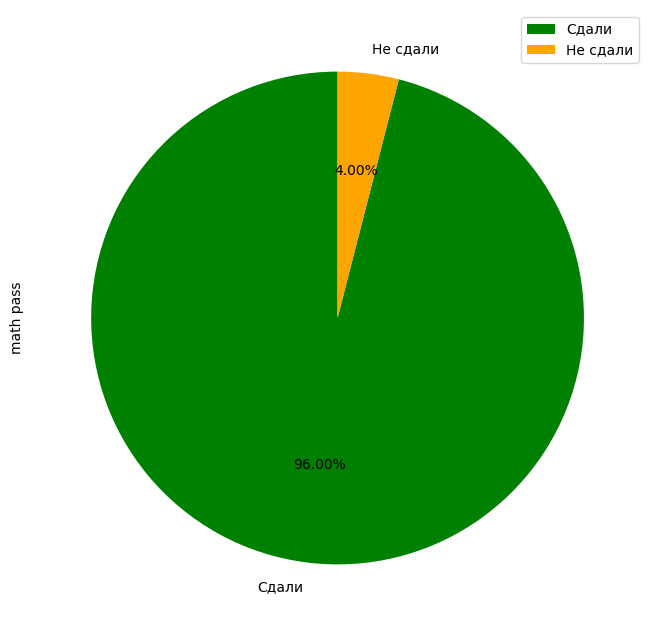

In [ ]:
df['math pass'] = df['math score'].apply(lambda x: 'Сдали' if x >= 40 else 'Не сдали')

math_pass_counts = df['math pass'].value_counts()
colors_pie = ['green', 'orange']
plt.figure(figsize=(8, 8))
math_pass_counts.plot.pie(autopct='%2.2f%%', startangle=90, colors=colors_pie)
plt.legend()
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

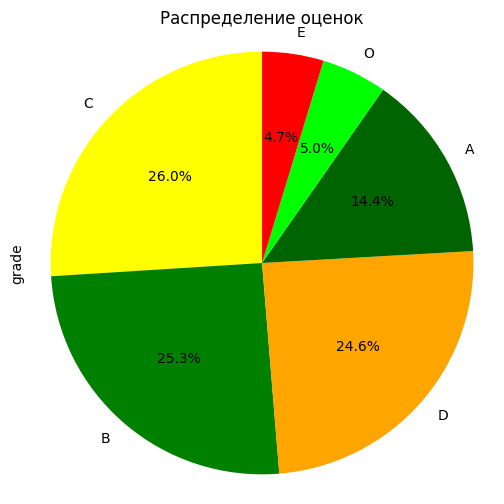

In [ ]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1) #высчитываем ср балл, на его основе будет делать вывод

bins = [0, 40, 60, 70, 80, 90, 100] # градация оценки
labels = ['E', 'D', 'C', 'B', 'A', 'O']
df['grade'] = pd.cut(df['average score'], bins=bins, labels=labels, include_lowest=True)

df.loc[df['math score'] < 40, 'grade'] = 'E'

grade_stud = df['grade'].value_counts()
colors_pie = ['yellow', 'green', 'orange',  'darkgreen',  'lime', 'red']
plt.figure(figsize=(6, 6))
grade_stud.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors_pie)
plt.axis('equal')
plt.title('Распределение оценок')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

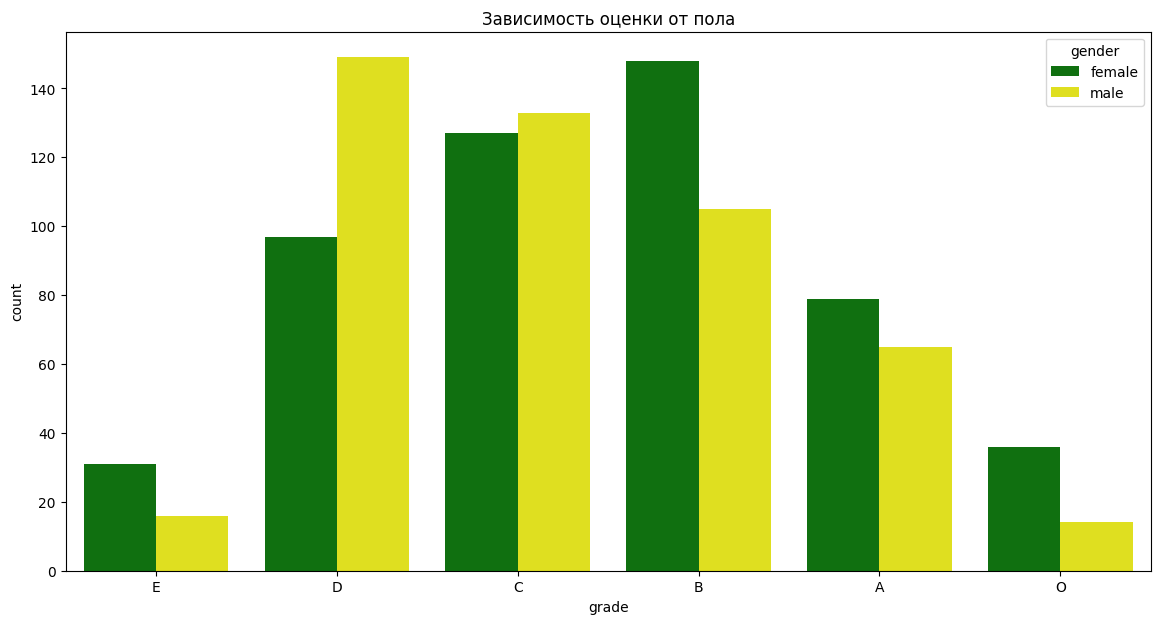

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='grade', hue='gender', data=df, palette=['green', 'yellow'])
plt.title('Зависимость оценки от пола')
plt.show()